In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error

np.random.seed(0)

In [ ]:
#read the data and show it
from google.colab import files
uploaded =files.upload()
#reading the data set into a pandas dataframe
df = pd.read_csv("Lumber-futures.csv")

Saving Lumber-futures.csv to Lumber-futures.csv


In [ ]:
df

,Date,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
0,2/2/2018,481.1,485.1,477.4,485.1,8.6,483.7,635,5519
1,2/1/2018,474.2,479.9,472.9,477.8,4.2,475.1,430,5513
2,1/31/2018,468.1,477.8,468.0,473.2,3.1,470.9,560,5628
3,1/30/2018,472.3,474.0,467.8,467.8,10.0,467.8,737,5770
4,1/29/2018,489.9,489.9,477.3,477.3,9.5,477.8,423,5784
...,...,...,...,...,...,...,...,...,...
11373,11/27/1972,127.1,127.1,127.1,127.1,NaN,127.1,0,1
11374,11/21/1972,127.0,127.0,127.0,127.0,NaN,127.0,0,1
11375,11/20/1972,128.4,128.4,128.4,128.4,NaN,128.4,0,1
11376,11/17/1972,128.4,128.4,128.4,128.4,NaN,128.4,0,1


In [ ]:
#converting data time to pandas date time format
df['Date'] = pd.to_datetime(df['Date'])

#chronologically sorting the rows of the data starting from the year 1972-11-16 till 2018-02-02
df = df.sort_values(by=['Date'])

#reset the index and drop the existing index instead of adding it as an additional column in the dataframe
df = df.reset_index(drop=True)

df


,Date,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
0,1972-11-16,128.4,128.4,128.4,128.4,NaN,128.4,1,1
1,1972-11-17,128.4,128.4,128.4,128.4,NaN,128.4,0,1
2,1972-11-20,128.4,128.4,128.4,128.4,NaN,128.4,0,1
3,1972-11-21,127.0,127.0,127.0,127.0,NaN,127.0,0,1
4,1972-11-27,127.1,127.1,127.1,127.1,NaN,127.1,0,1
...,...,...,...,...,...,...,...,...,...
11373,2018-01-29,489.9,489.9,477.3,477.3,9.5,477.8,423,5784
11374,2018-01-30,472.3,474.0,467.8,467.8,10.0,467.8,737,5770
11375,2018-01-31,468.1,477.8,468.0,473.2,3.1,470.9,560,5628
11376,2018-02-01,474.2,479.9,472.9,477.8,4.2,475.1,430,5513


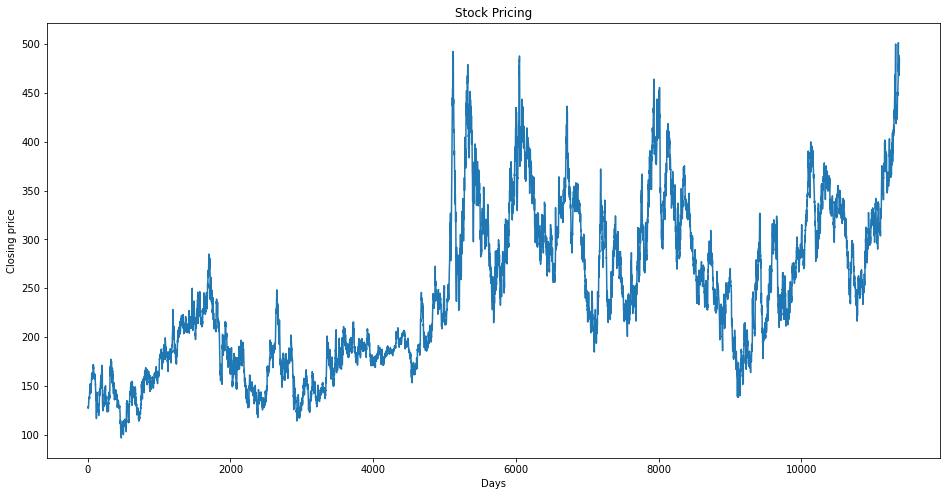

In [ ]:
#Visualize the closing price data, here 'Last' column header
plt.figure(figsize=(16,8))
plt.title('Stock Pricing')
plt.xlabel('Days')
plt.ylabel('Closing price')
plt.plot(df['Last'])
plt.show()

In [ ]:
#Create a new dataframe with only the Last column
data = df.filter(['Last'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train on
training_data_len = math.ceil(len(dataset)* 0.7)

training_data_len

7965

In [ ]:
#scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.07878489],
       [0.07878489],
       [0.07878489],
       ...,
       [0.93035317],
       [0.941714  ],
       [0.95974315]])

In [ ]:
#create the training data set
#create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
#split the data into x_train and y_train
x_train = []
y_train = []
timestep =100
for i in range(timestep, len(train_data)):
  x_train.append(train_data[i-timestep:i, 0])
  y_train.append(train_data[i,0])

  # if i<=101:
  #   print(x_train)
  #   print(y_train)
  #   print()
#len(x_train)

7865

In [ ]:
#convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
print(x_train)
x_train.shape


[[0.07878489 0.07878489 0.07878489 ... 0.14941961 0.15065448 0.15312423]
 [0.07878489 0.07878489 0.07532724 ... 0.15065448 0.15312423 0.16176834]
 [0.07878489 0.07532724 0.07557422 ... 0.15312423 0.16176834 0.15312423]
 ...
 [0.58952828 0.58755248 0.58779946 ... 0.70535935 0.69548037 0.70091381]
 [0.58755248 0.58779946 0.58409484 ... 0.69548037 0.70091381 0.7028896 ]
 [0.58779946 0.58409484 0.58804643 ... 0.70091381 0.7028896  0.69646826]]


(7865, 100)

In [ ]:
#reshape the data
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1))
x_train.shape


(7865, 100, 1)

In [ ]:
#build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(25))
model.add(Dense(1))


In [ ]:
#Compile model
model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
#Train the model
model.fit(x_train, y_train, batch_size=64, epochs=100)

Epoch 1/100
123/123 [==============================] - 25s 164ms/step - loss: 0.0125
Epoch 2/100
123/123 [==============================] - 20s 163ms/step - loss: 0.0013
Epoch 3/100
123/123 [==============================] - 20s 163ms/step - loss: 9.8604e-04
Epoch 4/100
123/123 [==============================] - 20s 165ms/step - loss: 8.6398e-04
Epoch 5/100
123/123 [==============================] - 20s 165ms/step - loss: 8.2459e-04
Epoch 6/100
123/123 [==============================] - 20s 164ms/step - loss: 6.7067e-04
Epoch 7/100
123/123 [==============================] - 20s 164ms/step - loss: 6.2096e-04
Epoch 8/100
123/123 [==============================] - 20s 164ms/step - loss: 5.3261e-04
Epoch 9/100
123/123 [==============================] - 20s 165ms/step - loss: 5.2144e-04
Epoch 10/100
123/123 [==============================] - 20s 165ms/step - loss: 4.2000e-04
Epoch 11/100
123/123 [==============================] - 20s 164ms/step - loss: 3.7659e-04
Epoch 12/100
123/123 [=====

In [ ]:
#Create testing data set
#create a new array containing scaled values from 
test_data = scaled_data[training_data_len - timestep: , :]

#Create data sets x_test, y_test
x_test=[]
y_test=dataset[training_data_len: , :]

for i in range(timestep, len(test_data)):
    x_test.append(test_data[i-timestep:i, 0])
    #y_test.append(test_data[i,0])
    
    #if i<=60:
       # print(x_test)
      #  print(y_test)

In [ ]:
#convert x_test to numpy array
x_test = np.array(x_test)
#x_test, y_test = np.array(x_test), np.array(y_test)
x_test.shape


(3413, 100)

In [ ]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [ ]:
#Get the models predictions on test data
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
print(predictions.shape)
print(predictions)


(3413, 1)
[[377.5593 ]
 [378.02   ]
 [381.1169 ]
 ...
 [460.4755 ]
 [466.2853 ]
 [470.16376]]


In [ ]:
#Get the root mean squared error
#rmse = math.sqrt(mean_squared_error(y_test, predictions))
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

1.8661050371225367

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


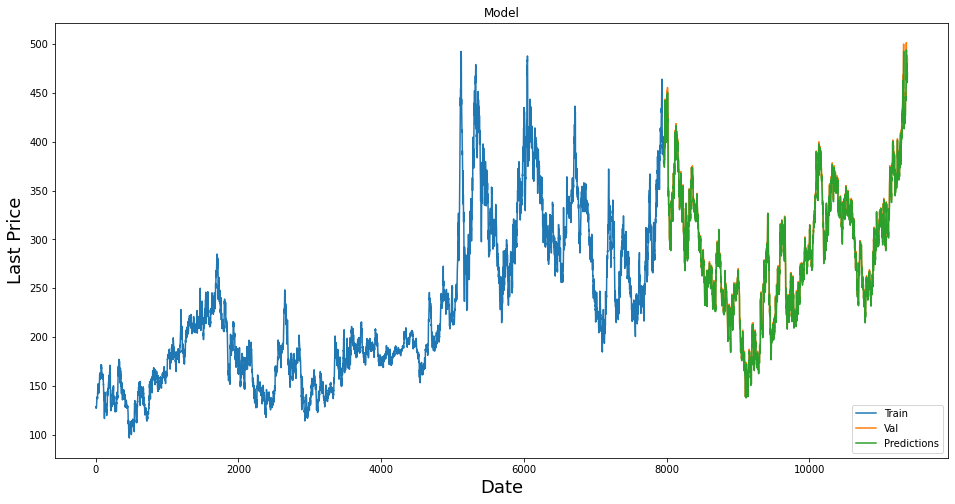

In [ ]:
#plot data
train = data[:training_data_len]
#print(train)
valid = data[training_data_len:]
#print(valid)
valid['Predictions'] = predictions

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Last Price', fontsize=18)
plt.plot(train['Last'])
plt.plot(valid[['Last', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
#Show the valid and predicted prices
valid

,Last,Predictions
7965,380.6,377.559296
7966,383.4,378.019989
7967,379.6,381.116913
7968,379.5,376.773956
7969,376.5,377.276520
...,...,...
11373,477.3,479.699036
11374,467.8,468.973877
11375,473.2,460.475494
11376,477.8,466.285309


In [ ]:
#read the data and show it
from google.colab import files
uploaded =files.upload()
#reading the data set into a pandas dataframe
df = pd.read_csv("Lumber-futures.csv")

Saving Lumber-futures.csv to Lumber-futures (1).csv


In [ ]:
#converting data time to pandas date time format
df['Date'] = pd.to_datetime(df['Date'])

#chronologically sorting the rows of the data starting from the year 1972-11-16 till 2018-02-02
df = df.sort_values(by=['Date'])

#reset the index and drop the existing index instead of adding it as an additional column in the dataframe
df = df.reset_index(drop=True)

df

,Date,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
0,1972-11-16,128.4,128.4,128.4,128.4,NaN,128.4,1,1
1,1972-11-17,128.4,128.4,128.4,128.4,NaN,128.4,0,1
2,1972-11-20,128.4,128.4,128.4,128.4,NaN,128.4,0,1
3,1972-11-21,127.0,127.0,127.0,127.0,NaN,127.0,0,1
4,1972-11-27,127.1,127.1,127.1,127.1,NaN,127.1,0,1
...,...,...,...,...,...,...,...,...,...
11373,2018-01-29,489.9,489.9,477.3,477.3,9.5,477.8,423,5784
11374,2018-01-30,472.3,474.0,467.8,467.8,10.0,467.8,737,5770
11375,2018-01-31,468.1,477.8,468.0,473.2,3.1,470.9,560,5628
11376,2018-02-01,474.2,479.9,472.9,477.8,4.2,475.1,430,5513


In [ ]:
# #create a new dataframe
# new_df = df.filter(['Last'])
# #print(new_df)
# last_100_days = new_df[-100:].values
# #print(last_60_days)
# last_100_days_scaled = scaler.fit_transform(last_100_days)
# X_test = []
# X_test.append(last_60_days_scaled)
# X_test = np.array(X_test)
# X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# pred_price = model.predict(X_test)
# pred_price = scaler.inverse_transform(pred_price)
# print(pred_price)


[[484.01227]]


In [ ]:
#get the actual value for the current date from the data and then check how close the model has predicted
#we do not have current data so cannot do this here